<a href="https://colab.research.google.com/github/Antonyjaiwin/Robotics_Software_and_Programming/blob/main/PRO_SH_OCT_03102025_1000AM_ST_357_Robotics_Software_and_Programming_IT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Requirements

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
!pip install pybullet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 MB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pybullet: filename=pybullet-3.2.7-cp312-cp312-linux_x86_64.whl size=99873469 sha256=04f74863809e18b5c0c3d0de5d7d8807b1a64ee8f1f509fe14c62ff12df7617a
  Stored in directory: /root/.cache/pip/wheels/72/95/1d/b336e5ee612ae9a019bfff4dc0bedd100ee6f0570db205fdf8
Successfully built pybullet


## Import Libraries

In [2]:
import pybullet as p
import pybullet_data
import time
import numpy as np
import matplotlib.pyplot as plt

## Create URDF Files as Python Strings

In [3]:
# 1. Two-Wheel Robot URDF
two_wheel_robot_urdf = """
<robot name="two_wheel_robot">
  <link name="chassis">
    <inertial>
      <mass value="1"/>
      <inertia ixx="0.1" ixy="0" ixz="0" iyy="0.1" iyz="0" izz="0.1"/>
    </inertial>
    <visual>
      <geometry>
        <box size="0.5 0.3 0.1"/>
      </geometry>
      <material name="blue">
        <color rgba="0 0 1 1"/>
      </material>
    </visual>
    <collision>
      <geometry>
        <box size="0.5 0.3 0.1"/>
      </geometry>
    </collision>
  </link>

  <link name="left_wheel">
    <inertial>
      <mass value="0.1"/>
      <inertia ixx="0.01" ixy="0" ixz="0" iyy="0.01" iyz="0" izz="0.01"/>
    </inertial>
    <visual>
      <geometry>
        <cylinder radius="0.1" length="0.05"/>
      </geometry>
      <material name="black">
        <color rgba="0 0 0 1"/>
      </material>
    </visual>
    <collision>
      <geometry>
        <cylinder radius="0.1" length="0.05"/>
      </geometry>
    </collision>
  </link>

  <joint name="chassis_to_left_wheel" type="continuous">
    <parent link="chassis"/>
    <child link="left_wheel"/>
    <origin xyz="0 0.175 0" rpy="1.5707 0 0"/>
    <axis xyz="0 0 1"/>
  </joint>

  <link name="right_wheel">
    <inertial>
      <mass value="0.1"/>
      <inertia ixx="0.01" ixy="0" ixz="0" iyy="0.01" iyz="0" izz="0.01"/>
    </inertial>
    <visual>
      <geometry>
        <cylinder radius="0.1" length="0.05"/>
      </geometry>
      <material name="black"/>
    </visual>
    <collision>
      <geometry>
        <cylinder radius="0.1" length="0.05"/>
      </geometry>
    </collision>
  </link>

  <joint name="chassis_to_right_wheel" type="continuous">
    <parent link="chassis"/>
    <child link="right_wheel"/>
    <origin xyz="0 -0.175 0" rpy="1.5707 0 0"/>
    <axis xyz="0 0 1"/>
  </joint>
</robot>
"""

# 2. Box Table URDF
box_table_urdf = """
<robot name="box_table">
  <link name="baseLink">
    <visual>
      <geometry>
        <box size="1 0.5 0.4"/>
      </geometry>
      <material name="brown">
        <color rgba="0.58 0.29 0 1"/>
      </material>
    </visual>
    <collision>
      <geometry>
        <box size="1 0.5 0.4"/>
      </geometry>
    </collision>
     <inertial>
      <mass value="10"/>
      <inertia ixx="1" ixy="0" ixz="0" iyy="1" iyz="0" izz="1"/>
    </inertial>
  </link>
</robot>
"""

# 3. Cylinder Pillar URDF
cylinder_pillar_urdf = """
<robot name="cylinder_pillar">
  <link name="baseLink">
    <visual>
      <geometry>
        <cylinder radius="0.2" length="1.5"/>
      </geometry>
      <material name="grey">
        <color rgba="0.5 0.5 0.5 1"/>
      </material>
    </visual>
    <collision>
      <geometry>
        <cylinder radius="0.2" length="1.5"/>
      </geometry>
    </collision>
     <inertial>
      <mass value="15"/>
      <inertia ixx="1" ixy="0" ixz="0" iyy="1" iyz="0" izz="1"/>
    </inertial>
  </link>
</robot>
"""

# 4. Wall URDF
wall_urdf = """
<robot name="wall">
  <link name="baseLink">
    <visual>
      <geometry>
        <box size="3 0.1 1"/>
      </geometry>
       <material name="light_grey">
        <color rgba="0.8 0.8 0.8 1"/>
      </material>
    </visual>
    <collision>
      <geometry>
        <box size="3 0.1 1"/>
      </geometry>
    </collision>
    <inertial>
      <mass value="20"/>
      <inertia ixx="1" ixy="0" ixz="0" iyy="1" iyz="0" izz="1"/>
    </inertial>
  </link>
</robot>
"""

# 5. Small Box Obstacle URDF
small_box_urdf = """
<robot name="small_box">
  <link name="baseLink">
    <visual>
      <geometry>
        <box size="0.3 0.3 0.3"/>
      </geometry>
      <material name="red">
        <color rgba="1 0 0 1"/>
      </material>
    </visual>
    <collision>
      <geometry>
        <box size="0.3 0.3 0.3"/>
      </geometry>
    </collision>
    <inertial>
      <mass value="2"/>
      <inertia ixx="1" ixy="0" ixz="0" iyy="1" iyz="0" izz="1"/>
    </inertial>
  </link>
</robot>
"""

# We'll write these strings to temporary files to be loaded by PyBullet
with open("two_wheel_robot.urdf", "w") as f:
    f.write(two_wheel_robot_urdf)
with open("box_table.urdf", "w") as f:
    f.write(box_table_urdf)
with open("cylinder_pillar.urdf", "w") as f:
    f.write(cylinder_pillar_urdf)
with open("wall.urdf", "w") as f:
    f.write(wall_urdf)
with open("small_box.urdf", "w") as f:
    f.write(small_box_urdf)

## Setup the Simulation Environment

In [4]:
# Start the physics simulation in DIRECT mode
physicsClient = p.connect(p.DIRECT)
p.setAdditionalSearchPath(pybullet_data.getDataPath())

# Set gravity
p.setGravity(0, 0, -9.81)

# Load a ground plane
planeId = p.loadURDF("plane.urdf")

# Define the positions and orientations for the static objects in the scene
# Format: [ [x, y, z], [roll, pitch, yaw in quaternions] ]
object_setup = {
    "wall1": {"file": "wall.urdf", "pos": [0, 1.5, 0.5], "orn": p.getQuaternionFromEuler([0, 0, 0])},
    "wall2": {"file": "wall.urdf", "pos": [-1.5, 0, 0.5], "orn": p.getQuaternionFromEuler([0, 0, 1.57])},
    "table": {"file": "box_table.urdf", "pos": [1, 0.5, 0.2], "orn": p.getQuaternionFromEuler([0, 0, 0.5])},
    "pillar1": {"file": "cylinder_pillar.urdf", "pos": [-1, -1, 0.75], "orn": p.getQuaternionFromEuler([0, 0, 0])},
    "pillar2": {"file": "cylinder_pillar.urdf", "pos": [1, -1, 0.75], "orn": p.getQuaternionFromEuler([0, 0, 0])},
    "box1": {"file": "small_box.urdf", "pos": [0, 0, 0.15], "orn": p.getQuaternionFromEuler([0, 0, 0.78])},
    "box2": {"file": "small_box.urdf", "pos": [-0.5, 0.8, 0.15], "orn": p.getQuaternionFromEuler([0, 0, 0.2])},
}

# Load the static objects into the scene
for obj_name, obj_data in object_setup.items():
    p.loadURDF(fileName=obj_data["file"], basePosition=obj_data["pos"], baseOrientation=obj_data["orn"])

## Define Robot Positions and Camera Viewpoints

In [5]:
robot_positions = [
    [-0.8, 0.8, 0.1],
    [0.5, 0, 0.1],
    [-0.5, -0.5, 0.1]
]

# Define three different camera viewpoints
camera_viewpoints = [
    { # View 1: High angle from the corner, looking down.
        'cameraEyePosition': [2.5, 2.5, 3],
        'cameraTargetPosition': [0, 0, 0],
        'cameraUpVector': [0, 0, 1]
    },
    { # View 2: Side view from outside the room.
        'cameraEyePosition': [3, 0, 1.5],
        'cameraTargetPosition': [0, 0, 0.5],
        'cameraUpVector': [0, 0, 1]
    },
    { # View 3: Low angle front view.
        'cameraEyePosition': [0, -3, 1.5],
        'cameraTargetPosition': [0, 0, 0.5],
        'cameraUpVector': [0, 0, 1]
    }
]

## Capture the Images

In [6]:
captured_images = []
width, height = 640, 480

for i in range(3):
    # Load the robot at its specified position for this view
    robotId = p.loadURDF("two_wheel_robot.urdf", robot_positions[i], p.getQuaternionFromEuler([0, 0, 1.57 * i]))

    # Set up the camera view matrix
    view_matrix = p.computeViewMatrix(
        cameraEyePosition=camera_viewpoints[i]['cameraEyePosition'],
        cameraTargetPosition=camera_viewpoints[i]['cameraTargetPosition'],
        cameraUpVector=camera_viewpoints[i]['cameraUpVector']
    )

    # Set up the projection matrix
    projection_matrix = p.computeProjectionMatrixFOV(
        fov=60.0,
        aspect=float(width) / height,
        nearVal=0.1,
        farVal=100.0
    )

    # Get the camera image
    img_arr = p.getCameraImage(
        width,
        height,
        view_matrix,
        projection_matrix,
        renderer=p.ER_BULLET_HARDWARE_OPENGL
    )

    # PyBullet returns a tuple. The 2nd element is the RGB image.
    # It needs to be reshaped from a 1D array to a 3D (height, width, channels) array.
    rgb_image = np.array(img_arr[2]).reshape((height, width, 4))

    # Store the processed image (without the alpha channel)
    captured_images.append(rgb_image[:, :, :3])

    # Remove the robot to place it again in the next iteration
    p.removeBody(robotId)

# Disconnect from the simulation
p.disconnect()

## Display the Rendered Images

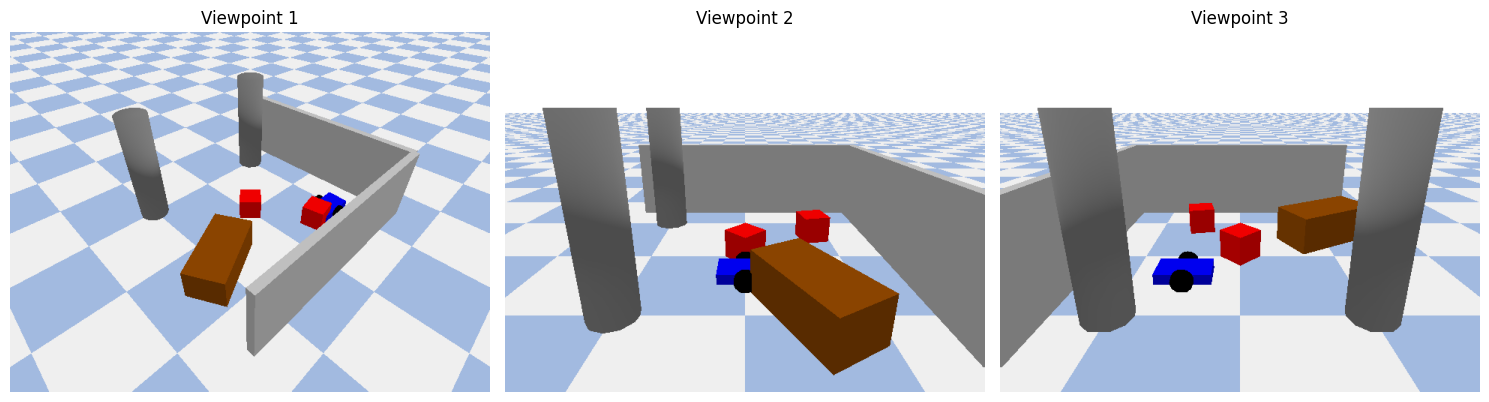

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(captured_images[0])
axes[0].set_title("Viewpoint 1")
axes[0].axis('off') # Hide axes ticks

axes[1].imshow(captured_images[1])
axes[1].set_title("Viewpoint 2")
axes[1].axis('off')

axes[2].imshow(captured_images[2])
axes[2].set_title("Viewpoint 3")
axes[2].axis('off')

plt.tight_layout()
plt.show()